In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import polars as pl
import os

In [2]:
def plot_bar_charts(df, columns):
    num_columns = len(columns)
    num_rows = math.ceil(num_columns / 3)
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        value_counts = df[col].value_counts()

        sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=axes[i])
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].set_title(f'{col} Distribution')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def count_summary(df, columns):
    result = []
    for col in columns:
        new = pd.DataFrame({
            'field': [col],
            'Unique': [df[col].nunique()],
            'Count': [df[col].count()],
            'NaN': [df[col].isnull().sum()],
            '>1': [sum(df[col].value_counts() > 1)]
        })
        result.append(new)
    return pd.concat(result, ignore_index=True)

def plot_session_by_hour(df,x,y,title):
    df['client_event_hour'] = df['min_client_event_time'].dt.hour
    df_mean = df.groupby(['client_event_hour'])['session_seconds'].mean()
    # plt.plot(df_mean)
    axis[x, y].plot(df_mean)
    axis[x, y].set_title(title)
    axis[x, y].set_xlabel("client_event_hour")
    axis[x, y].set_ylabel("Avg session_seconds")
    axis[x, y].set_xticks(range(24))

def plot_actions_by_hour(df,x,title):
    df['client_event_hour'] = df['min_client_event_time'].dt.hour
    df_sum = df.groupby(['client_event_hour']).agg({'event_type': 'count'})
    axis[x].plot(df_sum)
    axis[x].set_title(title)
    axis[x].set_xlabel("client_event_hour")
    axis[x].set_ylabel("total actions")
    axis[x].set_xticks(range(24))

In [3]:
df = pd.read_parquet("/kaggle/input/version-5/joey_removed.parquet")
# df = pl.read_parquet("/kaggle/input/version-5/joey_removed.parquet")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639235 entries, 0 to 2639234
Data columns (total 34 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   $insert_id                     object
 1   amplitude_id                   object
 2   app                            object
 3   city                           object
 4   client_event_time              object
 5   client_upload_time             object
 6   country                        object
 7   device_family                  object
 8   device_id                      object
 9   dma                            object
 10  event_id                       object
 11  event_properties               object
 12  event_time                     object
 13  event_type                     object
 14  language                       object
 15  library                        object
 16  os_name                        object
 17  processed_time                 object
 18  region                

In [5]:
df.describe()

,$insert_id,amplitude_id,app,city,client_event_time,client_upload_time,country,device_family,device_id,dma,...,rowModel,slug,displayName,type,[Amplitude] Session Replay ID,referrer_user,hostname,businessUnit,isInternalUser,roles
count,2639235,2639235,2639235,2639235,2639235,2639235,2639235,2639235,2639235,2639235,...,2639235,2639235,2639235,2639235,2639235,2639235,2639235,2639235,2639235,2639235
unique,2639234,4782,1,1311,2588904,1629013,38,13,33283,156,...,4,400,522,7,123586,49,16,277,3,98
top,6e7f8320-c29d-43c1-a34d-3a272b044a17,857540493886,591532,Nashville,2024-06-27 13:48:19.271000,2024-08-12 18:42:25.011000,United States,Windows,107661f8-dbfb-4e97-9ad4-b97218423080,"Nashville, TN",...,None,None,None,None,None,None,customer_zkcuy.federato.ai,None,False,['underwriter']
freq,2,59125,2639235,642960,411,18,2112868,2117912,34205,669683,...,2114454,1401497,1987159,1984966,1175145,1788356,822990,1417582,2437231,2056922


In [6]:
count_summary(df, ['$insert_id','amplitude_id', 'device_id','event_id','session_id','user_id','[Amplitude] Session Replay ID'])

,field,Unique,Count,NaN,>1
0,$insert_id,2639234,2639235,0,1
1,amplitude_id,4782,2639235,0,1967
2,device_id,33283,2639235,0,16260
3,event_id,125695,2639235,0,87076
4,session_id,355831,2639235,0,237381
5,user_id,1977,2639235,0,1791
6,[Amplitude] Session Replay ID,123586,2639235,0,109298


In [7]:
df['amplitude_id'].str.len().value_counts()

amplitude_id
12    2456170
13     183065
Name: count, dtype: int64

In [8]:
df.columns.values

array(['$insert_id', 'amplitude_id', 'app', 'city', 'client_event_time',
       'client_upload_time', 'country', 'device_family', 'device_id',
       'dma', 'event_id', 'event_properties', 'event_time', 'event_type',
       'language', 'library', 'os_name', 'processed_time', 'region',
       'server_received_time', 'server_upload_time', 'session_id',
       'user_id', 'user_properties', 'rowModel', 'slug', 'displayName',
       'type', '[Amplitude] Session Replay ID', 'referrer_user',
       'hostname', 'businessUnit', 'isInternalUser', 'roles'],
      dtype=object)

In [9]:
# didn't do eda on these columns
eda = ['$insert_id', 'amplitude_id', 'device_id','event_id', 'session_id',
       'user_id','[Amplitude] Session Replay ID',
       'event_properties', 'user_properties']

# Variables with many categories

In [10]:
df['slug'].value_counts()
# col_eda = ['slug']
# plot_bar_charts(df, col_eda)
# count_summary(df, col_eda)

slug
None                                  1401497
documents-and-compliance-table         181426
policy-detail-card                      79366
all-policies                            66022
my-book                                 48182
                                       ...   
email-inbox-new                             1
aviation-hull-summary                       1
flood-dependent-property-coverage           1
aviation-hull-technical-premium             1
aviation-liability-net-coinsurance          1
Name: count, Length: 400, dtype: int64

In [11]:
# document names? website names?
df['displayName'].value_counts()[df['displayName'].value_counts() > 100] 

displayName
None                              1987159
Documents And Compliance Table      65340
Gl Exposure History                 32307
Policy Detail Card - GL             31914
All Policies Mech Model             29427
                                   ...   
Sov                                   111
Financial Lines Coverages             108
Policy Detail Card - Umbrella         108
Primary/Umbrella Account info         105
Excess Payment Plan                   101
Name: count, Length: 174, dtype: int64

In [12]:
df['roles'].value_counts()

roles
['underwriter']                                                    2056922
['admin']                                                            96150
['underwriter', 'UA']                                                80133
['manager']                                                          73146
['underwriter', 'admin']                                             43797
                                                                    ...   
['BD']                                                                   3
['executive', 'System Manager', 'System Admin']                          2
['manager', 'admin', 'underwriter', 'executive']                         2
['manager', 'admin', 'underwriter', 'System Manager', 'Leader']          1
['underwriter', 'admin', 'manager', 'internal']                          1
Name: count, Length: 98, dtype: int64

In [13]:
# admin? uw?
df['businessUnit'].value_counts()[df['businessUnit'].value_counts() > 100]

businessUnit
None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [14]:
# admin? uw?
df['businessUnit'].value_counts()[df['businessUnit'].value_counts() == 1] 
# df['[Amplitude] Session Replay ID'].value_counts()

businessUnit
['ALEJANDRO-SILVA-a239704f-7931-4111-b214-26f33319b193']         1
['Underwriter', 'Underwriter Assistant']                         1
['LAZARO-MASEDA-1da04e50-bb9e-4f3e-83fe-fcdf1fb1e51b']           1
['KARI-ZERRAHN-72028545-c68d-47e7-a53a-f67ff23917dc']            1
['Ladna Test']                                                   1
['VALERIE-FAIRNINGTON-c96a0342-8731-4250-aa38-063941161c62']     1
['ABDIEL-DONOSO-c616a237-7a6b-4db6-85cf-087d8f1cccef']           1
['PAUL-LEFEBVRE-a65bd4fc-558d-42fb-8f92-3685b25d8bb0']           1
['SANDRA-SAM-e147c63a-fea4-4754-9924-f5ea0482b47d']              1
['ADRIANA-FOWLER-dff96313-9747-4dd2-a529-bb67233e078e']          1
['ERIC-CAMP-9d3dc0e4-e93d-4193-9708-19979e1bd44e']               1
['JONATHAN-REICH-54f0e30f-9d12-4a4c-ae2f-876d679f12ff']          1
['DOMINIQUE-KINCHELOW-37ae83c1-2b88-4fa5-b64d-ab06aa5419e5']     1
['LORISSA-BRAND-62740ea8-67ce-4470-90b0-1a0bc033c3db']           1
['MICHAEL-CORSO-c34d25dd-cff7-41e8-befa-9f1789d6e

In [15]:
# can group by google, microsoft, local uw portal etc
df['referrer_user'].value_counts()

referrer_user
None                                                                                          1788356
EMPTY                                                                                          266531
https://vru-auth.us.auth0.com/                                                                 255499
https://accounts.google.com/                                                                   144569
https://login.microsoftonline.com/                                                             100500
https://accounts.youtube.com/                                                                   19581
https://statics.teams.cdn.office.net/                                                           13758
https://accounts.google.co.in/                                                                  13244
https://www.google.com/                                                                         11934
https://app.datadoghq.com/                                          

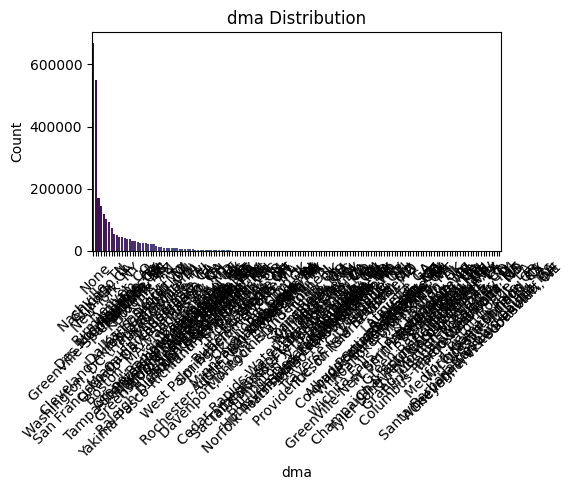

,field,Unique,Count,NaN,>1
0,dma,156,2639235,0,154


In [16]:
col_eda = ['dma']
plot_bar_charts(df, col_eda)
count_summary(df, col_eda)

In [17]:
df['dma'].value_counts()

dma
Nashville, TN                 669683
None                          550955
Greenville-Spartanburg, SC    170969
Chicago, IL                   145441
Atlanta, GA                   116986
                               ...  
Baton Rouge, LA                    2
Billings, MT                       2
Odessa-Midland, TX                 2
Hattiesburg-Laurel, MS             1
Palm Springs, CA                   1
Name: count, Length: 156, dtype: int64

In [18]:
# model how event_type affects session duration
df['event_type'].value_counts()[df['event_type'].value_counts() > 100]

event_type
account-lines::widget:render                                     470684
account-lines::configurable-table:render                         264023
account-lines:::view                                             172643
dashboard:my-book:configurable-table:render                      135146
dashboard:my-book:widget:render                                  128903
                                                                  ...  
bonds-page-view                                                     106
account-lines::custom-accordionundefined-1-accordion:selected       104
goals-and-rules:new-goal::view                                      102
dashboard:my-book:upcoming-policies-table:account-click             102
documents-and-compliance-accordion-selected                         102
Name: count, Length: 197, dtype: int64

In [19]:
df['event_type'].value_counts()

event_type
account-lines::widget:render                                    470684
account-lines::configurable-table:render                        264023
account-lines:::view                                            172643
dashboard:my-book:configurable-table:render                     135146
dashboard:my-book:widget:render                                 128903
                                                                 ...  
dashboard-new-business-link-click                                    1
submissions:all-fuad_test_config:configurable-table:render           1
account-lines::custom-accordion-editor-77-accordion:selected         1
account-lines::quote-packages-accordion-accordion:selected           1
account::planck-insights-accordion:selected                          1
Name: count, Length: 592, dtype: int64

In [20]:
col_eda = ['event_type']
count_summary(df, col_eda)

,field,Unique,Count,NaN,>1
0,event_type,592,2639235,0,526


# Variables with a manageable amount of categories
may still need to group categories with low credibility

In [21]:
df['app'].value_counts() # not sure what app does

app
591532    2639235
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


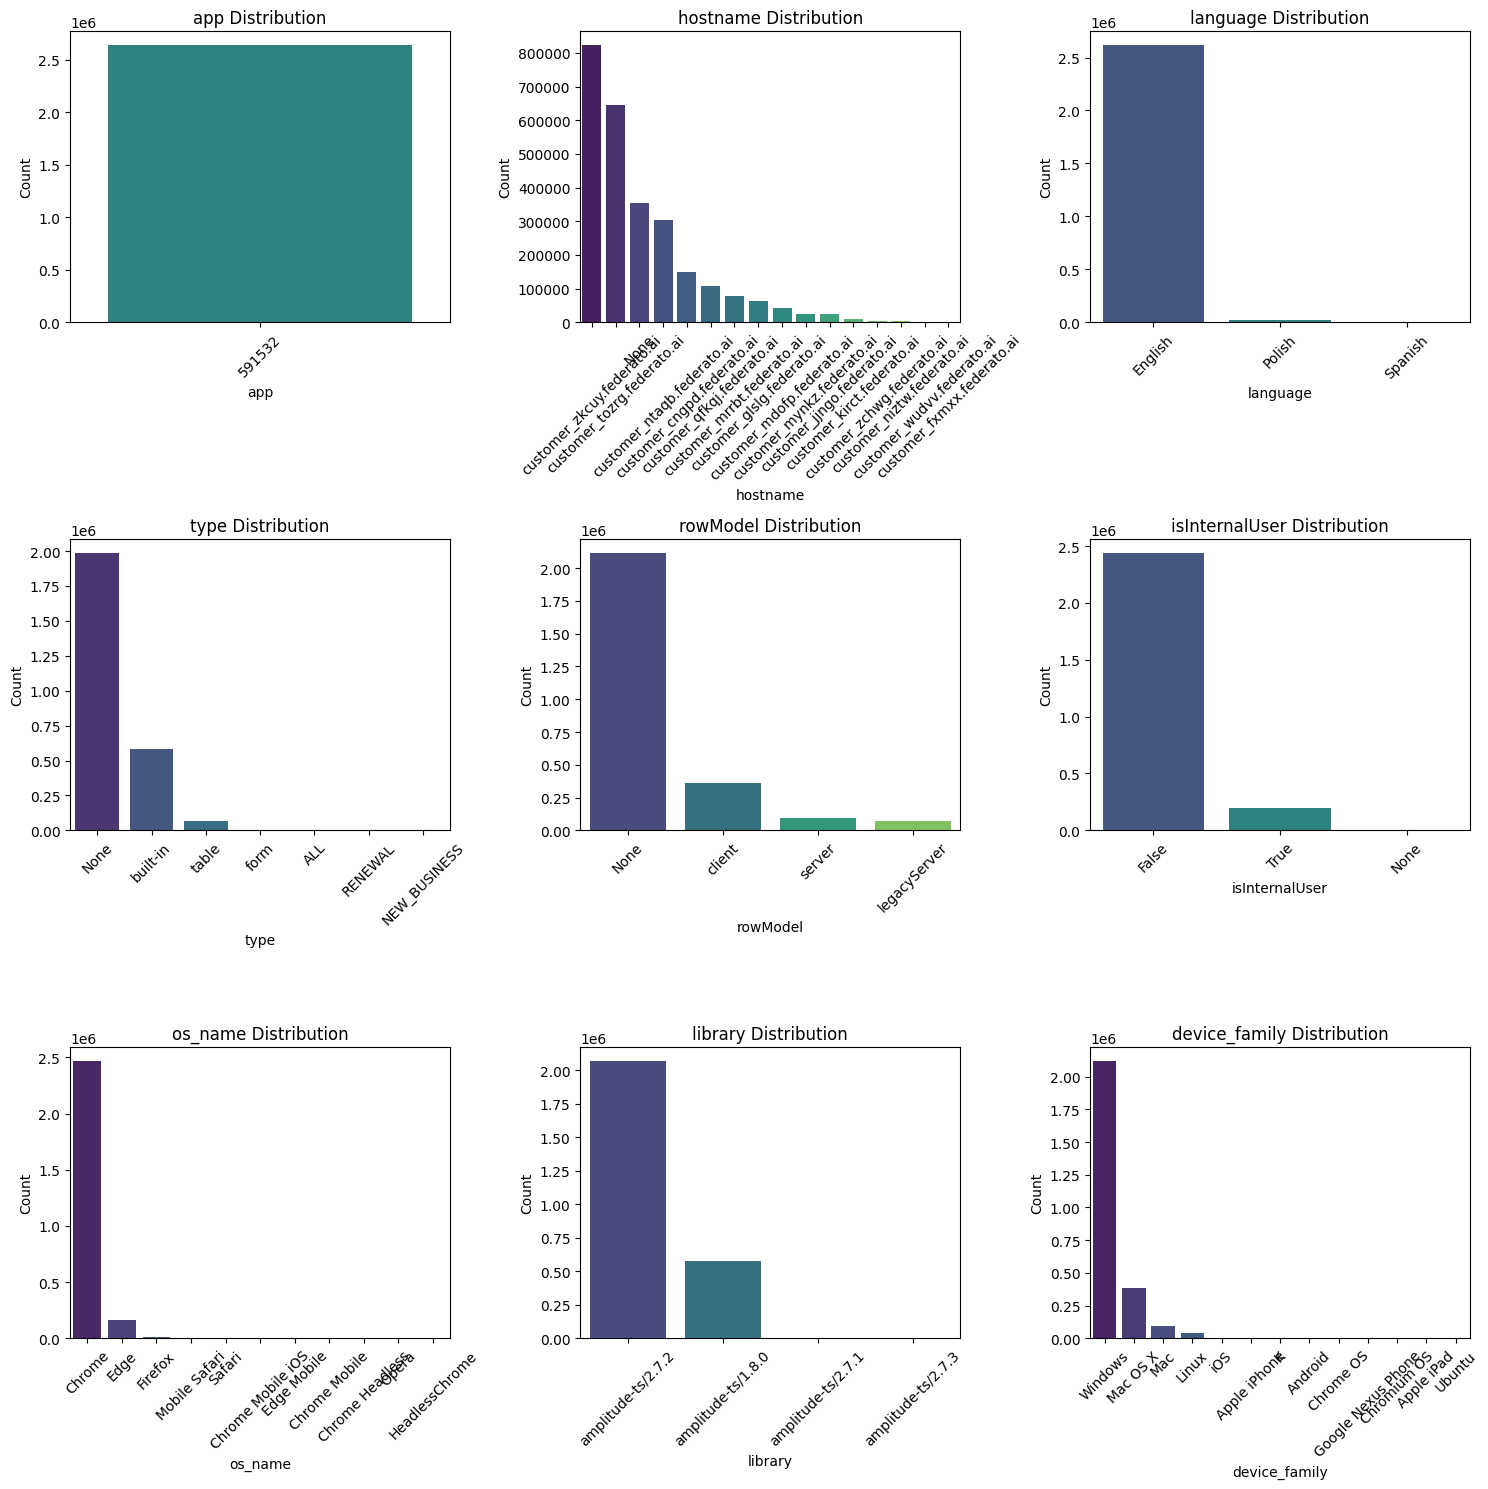

,field,Unique,Count,NaN,>1
0,app,1,2639235,0,1
1,hostname,16,2639235,0,16
2,language,3,2639235,0,3
3,type,7,2639235,0,7
4,rowModel,4,2639235,0,4
5,isInternalUser,3,2639235,0,3
6,os_name,11,2639235,0,11
7,library,4,2639235,0,4
8,device_family,13,2639235,0,12


In [22]:
col_eda = ['app','hostname','language','type','rowModel','isInternalUser','os_name', 'library','device_family']
plot_bar_charts(df, col_eda)
count_summary(df, col_eda)

In [23]:
df['device_family'].value_counts()

device_family
Windows               2117912
Mac OS X               385180
Mac                     95935
Linux                   37998
iOS                      1586
Apple iPhone              482
K                          67
Android                    42
Chrome OS                  19
Google Nexus Phone          7
Chromium OS                 3
Apple iPad                  3
Ubuntu                      1
Name: count, dtype: int64

In [24]:
df['library'].value_counts()

library
amplitude-ts/2.7.2    2066090
amplitude-ts/1.8.0     573102
amplitude-ts/2.7.1         37
amplitude-ts/2.7.3          6
Name: count, dtype: int64

In [25]:
df['os_name'].value_counts()

os_name
Chrome               2467095
Edge                  159513
Firefox                 9923
Mobile Safari           1657
Safari                   673
Chrome Mobile iOS        177
Edge Mobile              110
Chrome Mobile             42
Chrome Headless           38
Opera                      4
HeadlessChrome             3
Name: count, dtype: int64

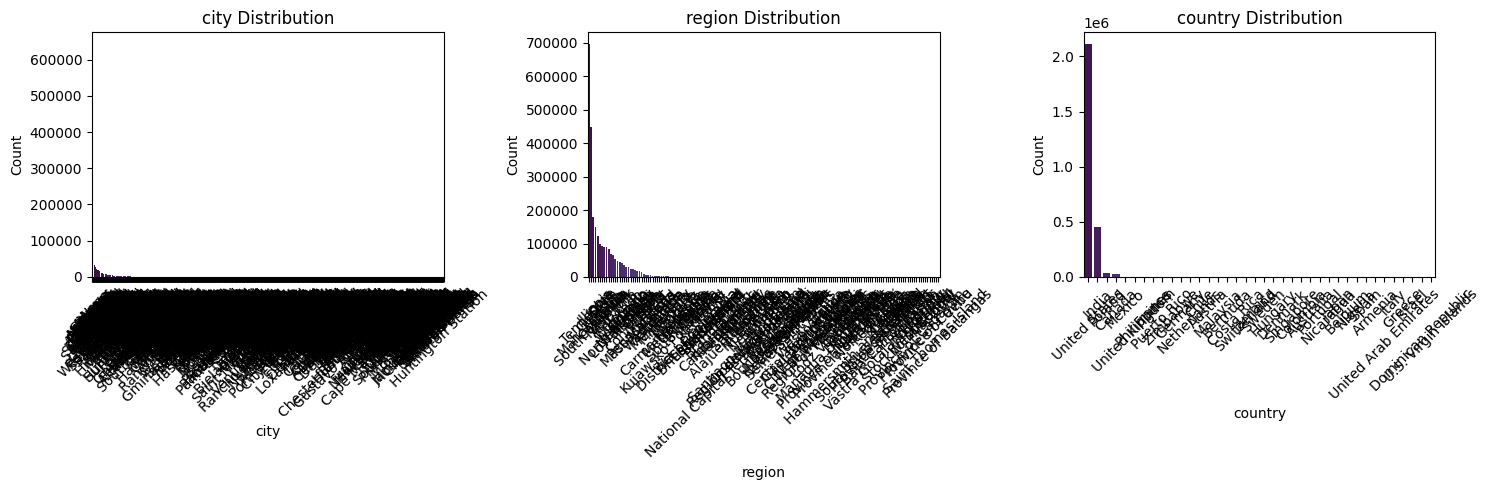

,field,Unique,Count,NaN,>1
0,city,1311,2639235,0,1201
1,region,160,2639235,0,152
2,country,38,2639235,0,35


In [26]:
col_eda = ['city', 'region', 'country']
plot_bar_charts(df, col_eda)
count_summary(df, col_eda)

# Analysis on time-related variables

In [27]:
# convert to datetime
df['client_event_time'] = pd.to_datetime(df['client_event_time'])
df['client_upload_time'] = pd.to_datetime(df['client_upload_time'])
df['event_time'] = pd.to_datetime(df['event_time'])
df['processed_time'] = pd.to_datetime(df['processed_time'])
df['server_received_time'] = pd.to_datetime(df['server_received_time'])
df['server_upload_time'] = pd.to_datetime(df['server_upload_time'])

# separate date and hour columns
df['client_event_date'] = pd.to_datetime(df['client_event_time']).dt.date
df['client_upload_date'] = pd.to_datetime(df['client_upload_time']).dt.date
df['event_date'] = pd.to_datetime(df['event_time']).dt.date
df['processed_date'] = pd.to_datetime(df['processed_time']).dt.date
df['server_received_date'] = pd.to_datetime(df['server_received_time']).dt.date
df['server_upload_date'] = pd.to_datetime(df['server_upload_time']).dt.date

df['client_event_hour'] = pd.to_datetime(df['client_event_time']).dt.hour
df['client_upload_hour'] = pd.to_datetime(df['client_upload_time']).dt.hour
df['event_hour'] = pd.to_datetime(df['event_time']).dt.hour
df['processed_hour'] = pd.to_datetime(df['processed_time']).dt.hour
df['server_received_hour'] = pd.to_datetime(df['server_received_time']).dt.hour
df['server_upload_hour'] = pd.to_datetime(df['server_upload_time']).dt.hour

# other variables created
df['client_check'] = df['client_event_date'] == df['client_upload_date']
# df['server_check'] = df['server_received_date'] == df['server_upload_date'] # all same day
df['idk_check'] = df['event_date'] == df['processed_date']

In [28]:
df['client_diff'] = df['client_upload_date'] - df['client_event_date']
df['client_diff'].value_counts()

<ipython-input-28-c33b843cfda1>:2: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  df['client_diff'].value_counts()


client_diff
0 days      2212517
13 days       11631
14 days       10603
21 days        8062
5 days         7932
             ...   
116 days          2
123 days          2
-1 days           2
298 days          1
136 days          1
Name: count, Length: 300, dtype: int64

<Axes: >

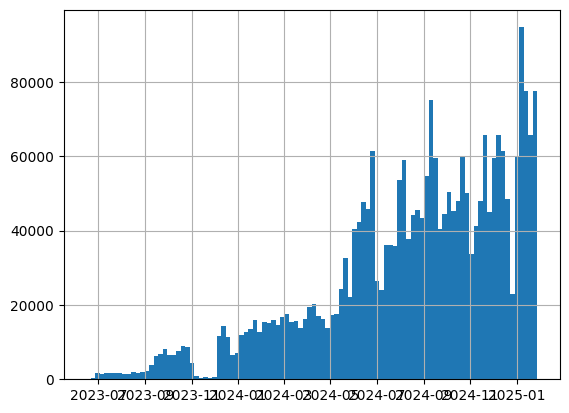

In [29]:
df['client_event_date'].hist(bins=100)

<Axes: >

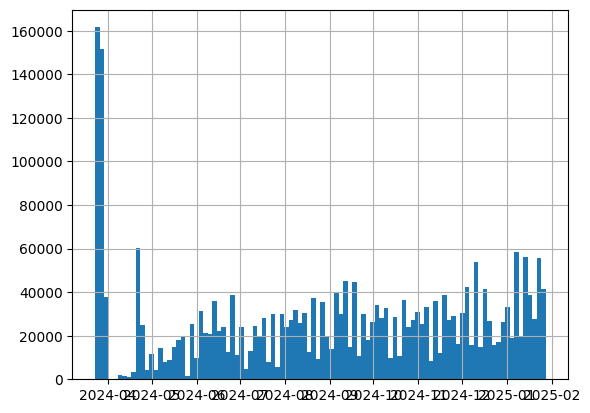

In [30]:
df['client_upload_date'].hist(bins=100)

<Axes: >

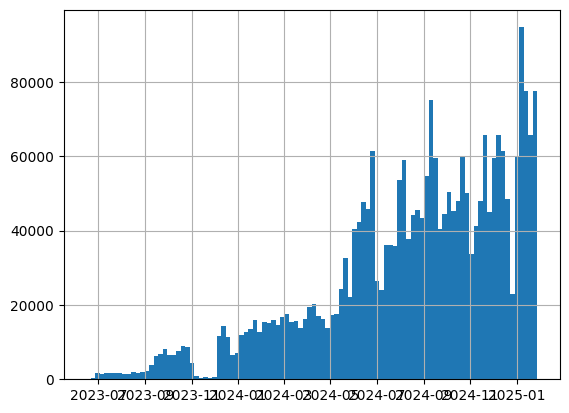

In [31]:
df['event_date'].hist(bins=100)

<Axes: >

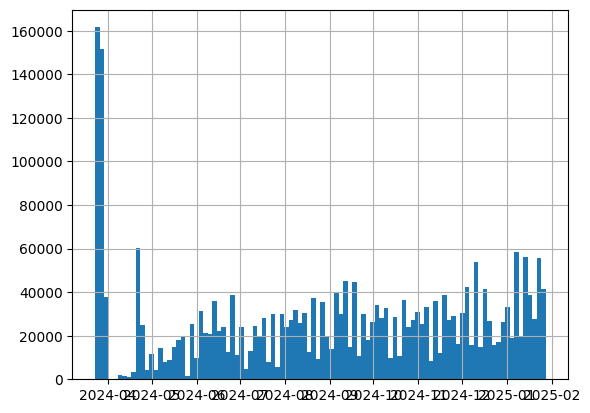

In [32]:
df['processed_date'].hist(bins=100)

<Axes: >

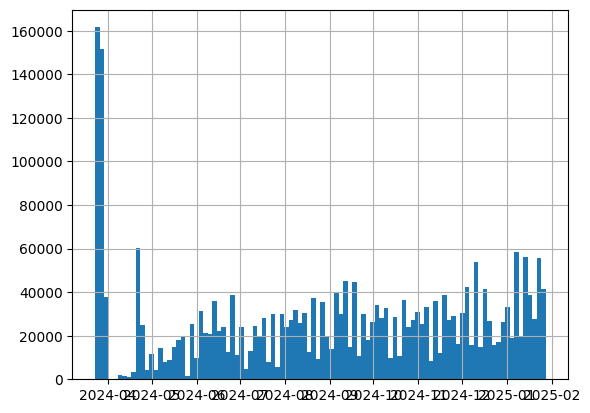

In [33]:
df['server_received_date'].hist(bins=100)

# Segmentation: analyze client_event_hour by segmenting session_seconds into 4 groups

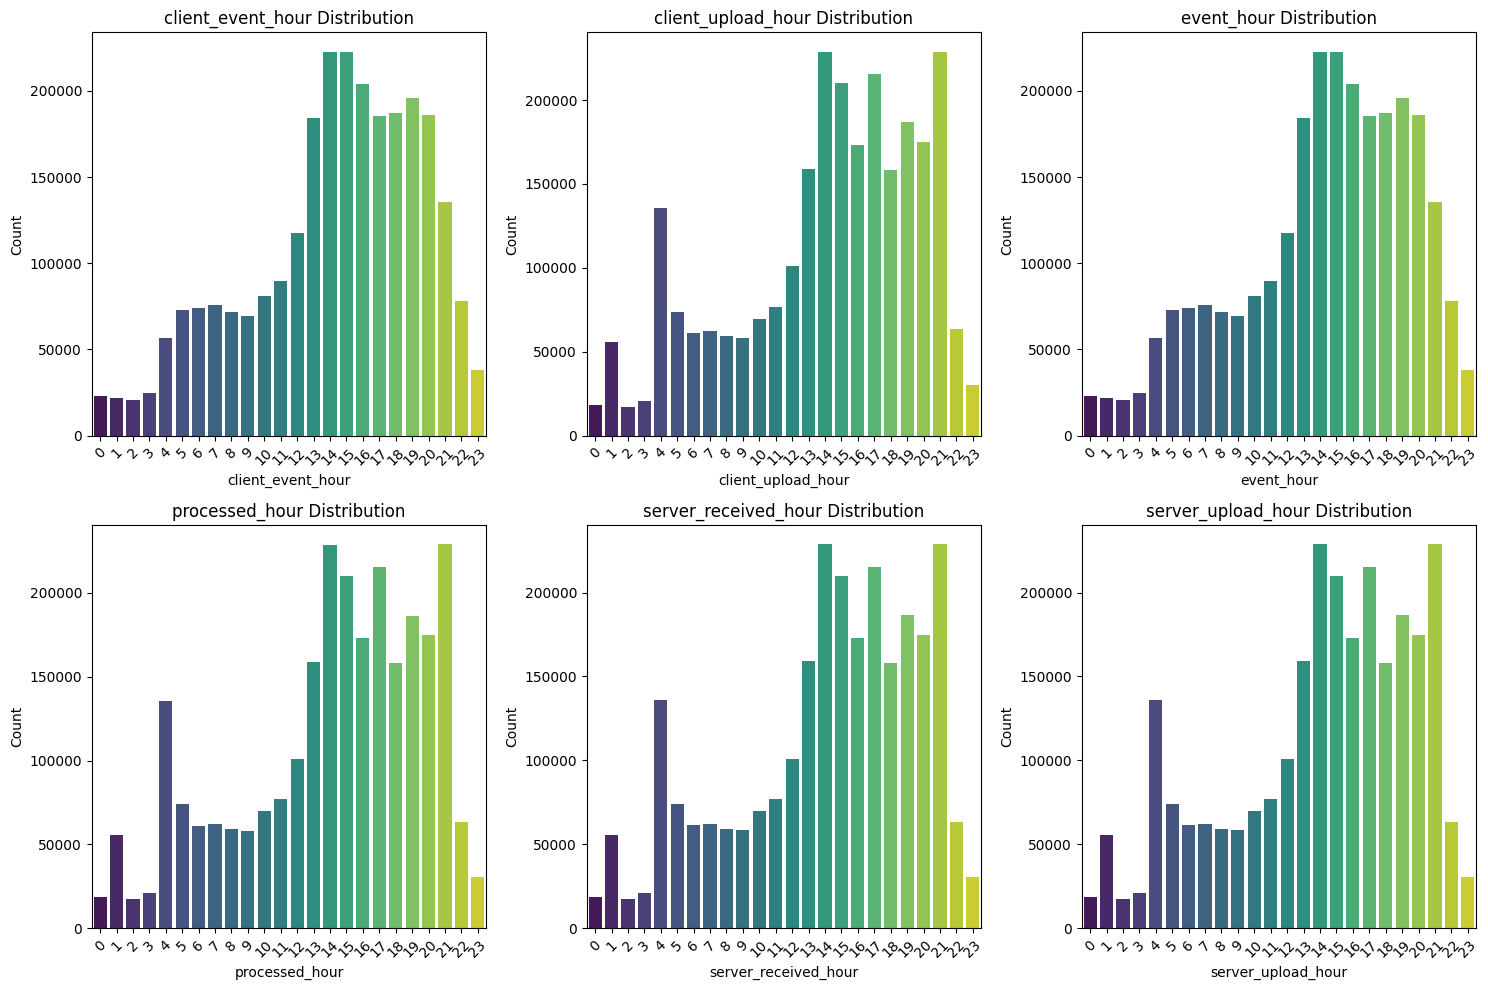

In [34]:
# df['client_event_hour'].hist(bins=100)
col_eda = ['client_event_hour','client_upload_hour','event_hour','processed_hour','server_received_hour','server_upload_hour']
plot_bar_charts(df, col_eda)

In [35]:
df = pl.read_parquet("/kaggle/input/version-5/joey_removed.parquet")

In [36]:
user_session = df.group_by(['user_id', 'session_id', 'roles']).agg(
    pl.min('client_event_time').alias('min_client_event_time'),
    pl.max('client_event_time').alias('max_client_event_time'),
    pl.col("event_type")
).with_columns( 
    pl.col("min_client_event_time").str.to_datetime(),
    pl.col("max_client_event_time").str.to_datetime()
).with_columns( 
    (pl.col('max_client_event_time') - pl.col('min_client_event_time')).alias('session_time')
).with_columns( 
    pl.col("session_time").dt.total_seconds().alias('session_seconds')
)

In [37]:
a = user_session.to_pandas()

<Axes: >

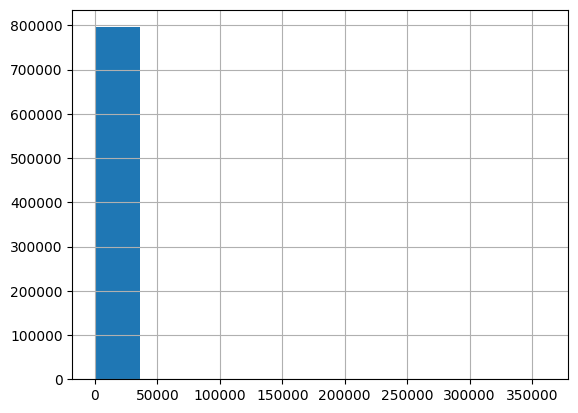

In [38]:
a["session_seconds"].hist()

<Axes: >

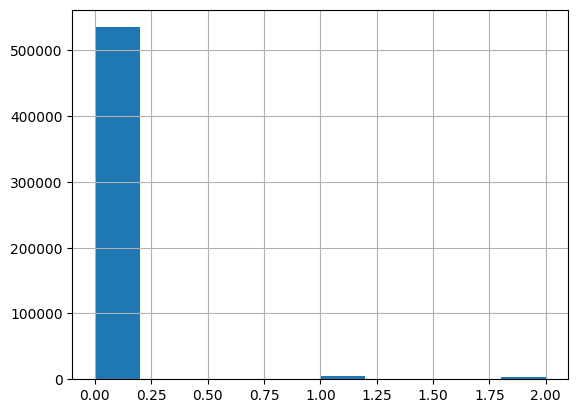

In [39]:
drill = a[a["session_seconds"] < 2.5]["session_seconds"]
drill.hist()

<Axes: >

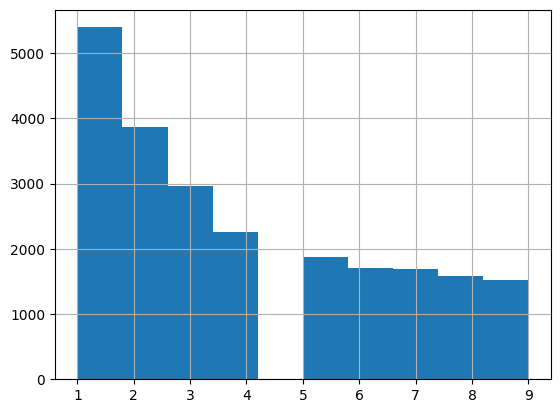

In [40]:
drill = a[(a["session_seconds"] > 0.25) & (a["session_seconds"] < 10)]["session_seconds"]
drill.hist()

<ipython-input-2-5a9dee6f72f3>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['client_event_hour'] = df['min_client_event_time'].dt.hour
<ipython-input-2-5a9dee6f72f3>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['client_event_hour'] = df['min_client_event_time'].dt.hour
<ipython-input-2-5a9dee6f72f3>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

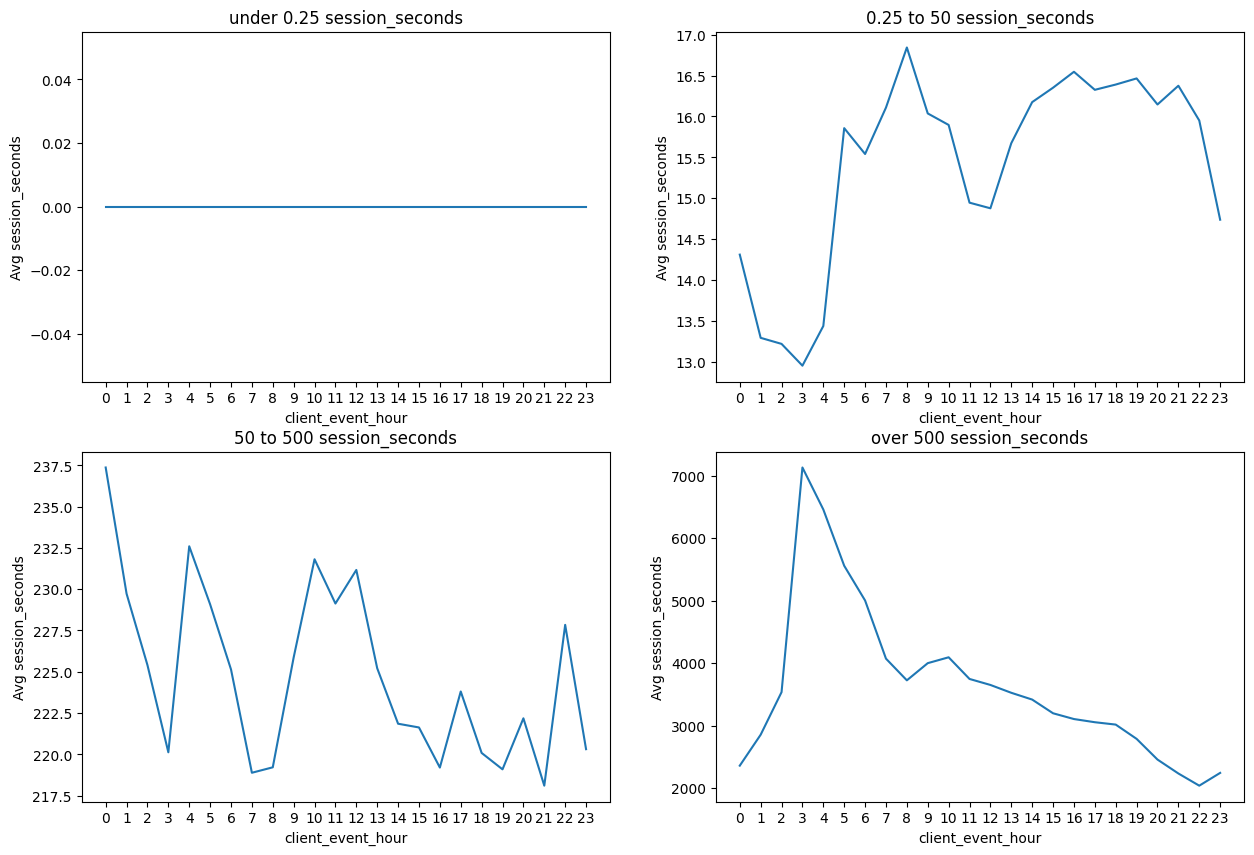

In [41]:
# segment by session_seconds
asmall = a[a["session_seconds"] <= 0.25]
a50 = a[(a["session_seconds"] > 0.25) & (a["session_seconds"] <= 50)]
a500 = a[(a["session_seconds"] > 50) & (a["session_seconds"] <= 500)]
abig = a[a["session_seconds"] > 500]

figure, axis = plt.subplots(2,2, figsize=(15, 2 * 5))
plot_session_by_hour(asmall,0,0, "under 0.25 session_seconds")
plot_session_by_hour(a50,0,1, "0.25 to 50 session_seconds")
plot_session_by_hour(a500,1,0, "50 to 500 session_seconds")
plot_session_by_hour(abig,1,1, "over 500 session_seconds")
plt.show()

# Segmentation: uw and non uw

x axis: client_event_hour <br>
y axis: avg actions (or sum of rows) per user <br>
recall a = user_session.to_pandas(), from the previous part

In [42]:
uw = a[a['roles'].str.contains("underwriter")] # 2432604 rows
non_uw = a[~a['roles'].str.contains("underwriter")] # 206631 rows

<ipython-input-2-5a9dee6f72f3>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['client_event_hour'] = df['min_client_event_time'].dt.hour
<ipython-input-2-5a9dee6f72f3>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['client_event_hour'] = df['min_client_event_time'].dt.hour


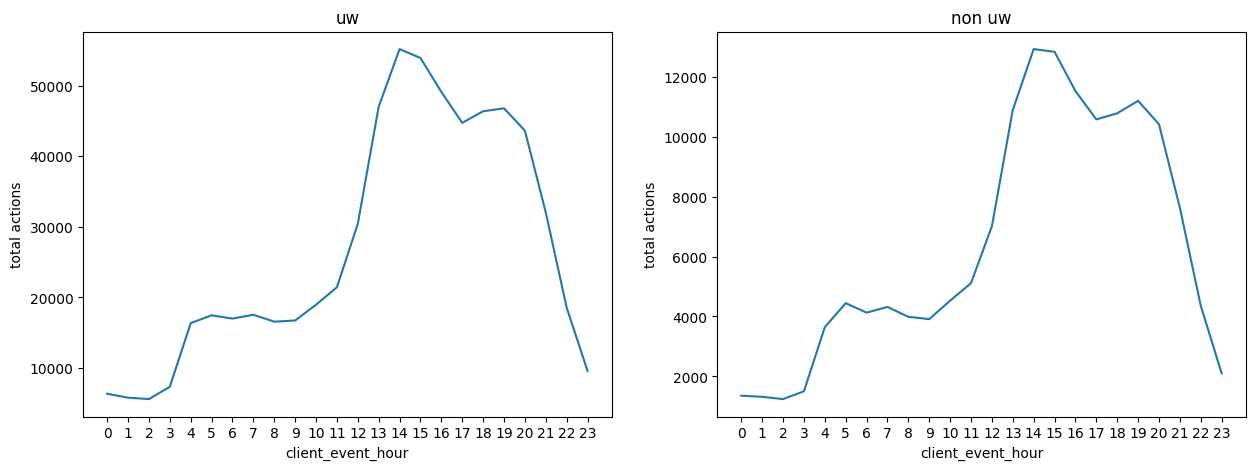

In [43]:
figure, axis = plt.subplots(1,2,figsize=(15, 1 * 5))
plot_actions_by_hour(uw,0,"uw")
plot_actions_by_hour(non_uw,1,"non uw")
plt.show()